In [136]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [137]:
ds = pd.read_csv(r"C:\Users\Devendra\Desktop\Meenu\diabetes.csv")
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [138]:
ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [139]:
ds['Glucose']=ds['Glucose'].replace(0,np.NaN)
ds['BloodPressure']=ds['BloodPressure'].replace(0,np.NaN)
ds['SkinThickness']=ds['SkinThickness'].replace(0,np.NaN)
ds['Insulin']=ds['Insulin'].replace(0,np.NaN)
ds['BMI']=ds['BMI'].replace(0,np.NaN)



In [140]:
ds.fillna(ds.median(),inplace=True)
print(ds.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# outlier detection

<Axes: >

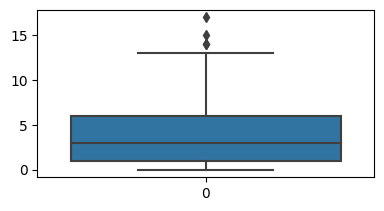

In [141]:
plt.figure(figsize=(20,10))
plt.subplot(4,4,1)
sns.boxplot(ds['Pregnancies'])

<Axes: >

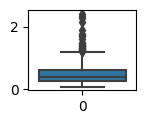

In [142]:
plt.subplot(4,4,1) 
sns.boxplot(ds['DiabetesPedigreeFunction'])

<Axes: >

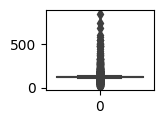

In [143]:
plt.subplot(4,4,1)
sns.boxplot(ds['Insulin'])

<Axes: >

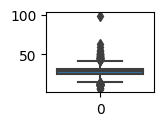

In [144]:
plt.subplot(4,4,1)
sns.boxplot(ds['SkinThickness'])

<Axes: >

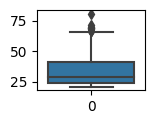

In [145]:
plt.subplot(4,4,1)
sns.boxplot(ds['Age'])

In [146]:
ds['Pregnancies']=ds['Pregnancies'].clip(lower=ds['Pregnancies'].quantile(0.05),upper=ds['Pregnancies'].quantile(0.95))

<Axes: >

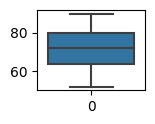

In [147]:
ds['BloodPressure']=ds['BloodPressure'].clip(lower=ds['BloodPressure'].quantile(0.05),upper=ds['BloodPressure'].quantile(0.95))
plt.subplot(4,4,1)
sns.boxplot(ds['BloodPressure'])

<Axes: >

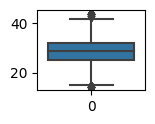

In [148]:
ds['SkinThickness']=ds['SkinThickness'].clip(lower=ds['SkinThickness'].quantile(0.05),upper=ds['SkinThickness'].quantile(0.95))
plt.subplot(4,4,1)
sns.boxplot(ds['SkinThickness'])

<Axes: >

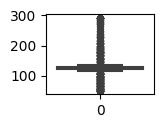

In [149]:
ds['Insulin']=ds['Insulin'].clip(lower=ds['Insulin'].quantile(0.05),upper=ds['Insulin'].quantile(0.95))
plt.subplot(4,4,1)
sns.boxplot(ds['Insulin'])

<Axes: >

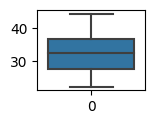

In [150]:
ds['BMI']=ds['BMI'].clip(lower=ds['BMI'].quantile(0.05),upper=ds['BMI'].quantile(0.95))
plt.subplot(4,4,1)
sns.boxplot(ds['BMI'])

<Axes: >

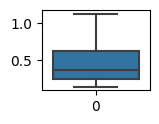

In [151]:
ds['DiabetesPedigreeFunction']=ds['DiabetesPedigreeFunction'].clip(lower=ds['DiabetesPedigreeFunction'].quantile(0.05),upper=ds['DiabetesPedigreeFunction'].quantile(0.95))
plt.subplot(4,4,1)
sns.boxplot(ds['DiabetesPedigreeFunction'])

<Axes: >

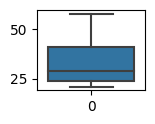

In [152]:
ds['Age']=ds['Age'].clip(lower=ds['Age'].quantile(0.05),upper=ds['Age'].quantile(0.95))
plt.subplot(4,4,1)
sns.boxplot(ds['Age'])

In [153]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
x=ds.drop(['Outcome'],axis=1)
y=ds['Outcome']
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model.fit(x_train,y_train)

GaussianNB()

In [154]:
pred=model.predict(x_test)
print(pred)

[1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1
 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0
 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0
 0 1 1 0 0 1]


In [155]:
accuracy=metrics.accuracy_score(pred,y_test)
print(accuracy)

0.7727272727272727


In [156]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("accuracy is",metrics.accuracy_score(y_pred, y_test))

accuracy is 0.7467532467532467


In [157]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [158]:
from sklearn.linear_model import LogisticRegression
l_clf= LogisticRegression()
l_clf.fit(x_train,y_train)
y_pred=l_clf.predict(x_test)
print("accuracy of  LogisticRegression clf is", metrics.accuracy_score(y_pred, y_test))

accuracy of  LogisticRegression clf is 0.8051948051948052


In [159]:
from sklearn.neighbors import KNeighborsClassifier
k_clf= KNeighborsClassifier()
k_clf.fit(x_train,y_train)
y_pred=k_clf.predict(x_test)
print("accuracy of  KNeighborsClassifier clf is", metrics.accuracy_score(y_pred, y_test))

accuracy of  KNeighborsClassifier clf is 0.7467532467532467
